# **Final Project: Twitter Bot Detection**

*For details pls check the project report

## **PART 1 - Dataset**

### **1.1 Description**

In [1]:
import random, itertools, traceback
import numpy as np
import pandas as pd
import imblearn as ibl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.utils import shuffle

# Accounts
fake = pd.read_csv("./dataset/fake/users.csv")
genuine = pd.read_csv("./dataset/genuine/users.csv")
social1 = pd.read_csv("./dataset/social1/users.csv")
social2 = pd.read_csv("./dataset/social2/users.csv")
social3 = pd.read_csv("./dataset/social3/users.csv")
traditional2 = pd.read_csv("./dataset/traditional2/users.csv")
traditional3 = pd.read_csv("./dataset/traditional3/users.csv")
traditional4 = pd.read_csv("./dataset/traditional4/users.csv")

# Concatenate All Dataframe as One
social = pd.concat([social1, social2, social3])
traditional = pd.concat([traditional2, traditional3, traditional4])
bot_accounts = pd.concat([social, traditional, fake])
bots_no_trad = pd.concat([social, fake])

bot_accounts['is_bot'] = 1
bots_no_trad['is_bot'] = 1
genuine['is_bot'] = 0

accounts = pd.concat([bot_accounts, genuine])
accounts = shuffle(accounts)
accounts = accounts.fillna('')

accounts_no_trad = pd.concat([bots_no_trad, genuine])
accounts_no_trad = shuffle(accounts_no_trad)
accounts_no_trad = accounts_no_trad.fillna('')

In [3]:
# Tweets
fake_t = pd.read_csv("./dataset/fake/tweets.csv", encoding='latin-1')
genuine_t = pd.read_csv("./dataset/genuine/tweets.csv", encoding='latin-1')
social1_t = pd.read_csv("./dataset/social1/tweets.csv", encoding='latin-1')
social2_t = pd.read_csv("./dataset/social2/tweets.csv", encoding='latin-1')
social3_t = pd.read_csv("./dataset/social3/tweets.csv", encoding='latin-1')

# Concatenate All Dataframe as One
social_t = pd.concat([social1_t, social2_t, social3_t])
bot_accounts_t = pd.concat([social_t, fake_t])

bot_accounts_t['is_bot'] = 1
genuine_t['is_bot'] = 0
genuine_t = genuine_t[genuine_t['user_id'].notna()]
genuine_t['user_id'].astype('int64')

tweets = pd.concat([bot_accounts_t, genuine_t])
tweets = shuffle(tweets)
tweets = tweets.fillna('')

tweets['time'] = pd.to_datetime(tweets['timestamp']).dt.time
tweets['time'] = pd.to_timedelta(tweets.time.astype(str))

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### **1.2 Statistics**

**images are in project reports*

In [ ]:
"""Number of Twitter Accounts Per Dataset"""

sns.set_style("whitegrid")
num_accounts = {'Fake': len(fake.index), 'Human': len(genuine.index), 'Political': len(social1.index),
                'Apps Promo': len(social2.index), 'Amazon': len(social3.index), 'Scam URL': len(traditional2.index),
                'Job Offers1': len(traditional3.index), 'Job Offers2': len(traditional4.index)}

In [ ]:
"""Average Number of Followers Per Account Per Dataset"""

avg_followers = {'Fake': fake["followers_count"].sum()/len(fake.index), 'Human': genuine["followers_count"].sum()/len(genuine.index),
                'Political': social1["followers_count"].sum()/len(social1.index), 'Apps Promo': social2["followers_count"].sum()/len(social2.index),
                'Amazon': social3["followers_count"].sum()/len(social3.index), 'Scam URL': traditional2["followers_count"].sum()/len(traditional2.index),
                'Job Offers1': traditional3["followers_count"].sum()/len(traditional3.index),
                'Job Offers2': traditional4["followers_count"].sum()/len(traditional4.index)}

In [ ]:
"""Average Number of Friends Per Account Per Dataset"""

avg_friends = {'Fake': fake["friends_count"].sum()/len(fake.index), 'Human': genuine["friends_count"].sum()/len(genuine.index),
                'Political': social1["friends_count"].sum()/len(social1.index), 'Apps Promo': social2["friends_count"].sum()/len(social2.index),
                'Amazon': social3["friends_count"].sum()/len(social3.index), 'Scam URL': traditional2["friends_count"].sum()/len(traditional2.index),
                'Job Offers1': traditional3["friends_count"].sum()/len(traditional3.index),
                'Job Offers2': traditional4["friends_count"].sum()/len(traditional4.index)}

In [ ]:
"""Average Number of Tweets Per Account Per Dataset"""

avg_tweets = {'Fake': fake["statuses_count"].sum()/len(fake.index), 'Human': genuine["statuses_count"].sum()/len(genuine.index),
                'Political': social1["statuses_count"].sum()/len(social1.index), 'Apps Promo': social2["statuses_count"].sum()/len(social2.index),
                'Amazon': social3["statuses_count"].sum()/len(social3.index), 'Scam URL': traditional2["statuses_count"].sum()/len(traditional2.index),
                'Job Offers1': traditional3["statuses_count"].sum()/len(traditional3.index),
                'Job Offers2': traditional4["statuses_count"].sum()/len(traditional4.index)}

In [ ]:
"""Average Favourites Per Account Per Dataset"""

avg_fav = {'Fake': fake["favourites_count"].sum()/len(fake.index), 'Human': genuine["favourites_count"].sum()/len(genuine.index),
                'Political': social1["favourites_count"].sum()/len(social1.index), 'Apps Promo': social2["favourites_count"].sum()/len(social2.index),
                'Amazon': social3["favourites_count"].sum()/len(social3.index), 'Scam URL': traditional2["favourites_count"].sum()/len(traditional2.index),
                'Job Offers1': traditional3["favourites_count"].sum()/len(traditional3.index),
                'Job Offers2': traditional4["favourites_count"].sum()/len(traditional4.index)}

In [ ]:
"""Average Listed Count Per Account Per Dataset"""

avg_fav = {'Fake': fake["listed_count"].sum()/len(fake.index), 'Human': genuine["listed_count"].sum()/len(genuine.index),
                'Political': social1["listed_count"].sum()/len(social1.index), 'Apps Promo': social2["listed_count"].sum()/len(social2.index),
                'Amazon': social3["listed_count"].sum()/len(social3.index), 'Scam URL': traditional2["listed_count"].sum()/len(traditional2.index),
                'Job Offers1': traditional3["listed_count"].sum()/len(traditional3.index),
                'Job Offers2': traditional4["listed_count"].sum()/len(traditional4.index)}

In [ ]:
counts = [0, 0]
sums = [0, 0]

for index, row in bot_accounts.iterrows():
  result = scoringPostAllDayNight(row)
  if result == 0:
    continue
  else:
    sums[0] += result
    counts[0] += 1

for index, row in genuine.iterrows():
  result = scoringPostAllDayNight(row)
  if result == 0:
    continue
  else:
    sums[1] += result
    counts[1] += 1

average = [sums[0]/counts[0], sums[1]/counts[1]] # [34.83, 217.12]

In [ ]:
distri_1 = []
for index, row in bot_accounts.iterrows():
  result = scoringLevenshtein(row)
  if result == 0:
    continue
  else:
    distri_1.append(result)

distri_2 = []
for index, row in genuine.iterrows():
  result = scoringLevenshtein(row)
  if result == 0:
    continue
  else:
    distri_2.append(result)

average = [sum(distri_1)/len(distri_1), sum(distri_2)/len(distri_2)]

In [ ]:
keys = list(avg_fav.keys())
vals = [int(avg_fav[k]) for k in keys]
plt.figure(figsize=(15,8))
#plt.style.use("dark_background")
ax = sns.barplot(x = keys, y = vals)
ax.set_title('Average Number of Tweets Per Account Per Dataset')
ax.set_ylabel('Average Number of Tweets')
#ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
#ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.savefig('./figures/fig4.png', transparent=True)

## **PART 2 - Account-Level Classification**

### **2.1 Feature Scoring**

In [4]:
def ScoreFollower(user):
  return 1 if user['followers_count'] < 30 else 0
def ScoreFriends(user):
  return 1 if user['friends_count'] > 800 or user['friends_count'] < 50 else 0
def ScoringFavorites(user):
  return 1 if user['favourites_count'] < 30 else 0
def ScoringListed(user):
  return 1 if user['listed_count'] > 50 or user['listed_count'] < 10 else 0
def ScoreLessTweets(user):
  return 1 if user['statuses_count'] < 1000 else 0
def ScoreEmptyTweets(user):
  return 1 if user['statuses_count'] == 0 else 0
def ScoreBannerURL(user):
  return 1 if user['profile_banner_url'] != '' else 0
def ScoreImageURL(user):
  return 1 if user['profile_image_url'] != '' else 0
def ScoreAvatar(user):
  return 1 if user['default_profile_image'] != '' else 0
def ScoreDescription(user):
  return 1 if user['description'] == '' else 0
def ScoreLocation(user):
  return 1 if user['geo_enabled'] == '' else 0
def ScoreVerified(user):
  return 1 if user['verified'] != '' else 0
def ScoreProtected(user):
  return 1 if user['protected'] != '' else 0
def SetLabel(user):
  return 1 if user['is_bot'] == 1 else 0

In [5]:
Functions = {
  ScoreFollower: 'Follower', ScoreFriends: 'Friends', ScoringFavorites: 'Favorites',
  ScoringListed: 'Listed', ScoreLessTweets: 'LessTweets', ScoreEmptyTweets: 'EmptyTweets',
  ScoreBannerURL: 'BannerURL', ScoreImageURL: 'ImageURL', ScoreAvatar: 'Avatar',
  ScoreDescription: 'Description', ScoreLocation: 'Location', ScoreVerified: 'Verified',
  ScoreProtected: 'Protected', SetLabel: 'IsBot',
}

score = pd.DataFrame()
score['ID'] = accounts['id']

In [6]:
for func in Functions.keys():
  score[Functions[func]] = accounts.apply(lambda item: func(item), axis = 1)

In [8]:
from collections import Counter
new_score = score.copy()
del new_score['ID']

if 'IsBot' in new_score:
  y = new_score['IsBot'].values
  del new_score['IsBot']
  X = new_score.values
Counter(y)

Counter({1: 9894, 0: 3474})

### **2.2 Apply Oversampling and Undersampling**

In [9]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=42)
X, y = sme.fit_resample(X, y)
X, y = shuffle(X, y)
Counter(y)

Counter({1: 9059, 0: 7277})

### **2.3 Logistic Regression**

In [10]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

kf = KFold(n_splits=3, random_state=None)
lr = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

for train_index , test_index in kf.split(X):
  X_train = X[train_index]
  y_train = y[train_index]
    
  X_test = X[test_index]
  y_test = y[test_index]

  lr.fit(X_train, y_train)
  y_hat = lr.predict(X_test)

  print('Confusion Matrix (AUC: {}):\n'.format(accuracy_score(y_test, y_hat)), confusion_matrix(y_test, y_hat))

Confusion Matrix (AUC: 0.9944913698127066):
 [[2395   30]
 [   0 3021]]
Confusion Matrix (AUC: 0.9950413223140496):
 [[2405   27]
 [   0 3013]]
Confusion Matrix (AUC: 0.9955922865013774):
 [[2397   23]
 [   1 3024]]


### **2.4 Weights Normalization**

In [11]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

lr.fit(X_train_scaled, y_train)
y_hat = lr.predict(X_test_scaled)

In [12]:
weights = lr.coef_.T
variable_names = new_score.columns
weight_dic = {}
for coef, name in zip(weights, variable_names):
  print(name, 'has weight of', coef[0])
  weight_dic[name] = coef[0]

Follower has weight of -1.360162245512275
Friends has weight of 0.5100998828293891
Favorites has weight of 7.153229517528755
Listed has weight of -1.6057991991308558
LessTweets has weight of 0.5293280267156838
EmptyTweets has weight of 0.3205289390962539
BannerURL has weight of -2.3364772051171308
ImageURL has weight of 0.0
Avatar has weight of -0.20692241259854188
Description has weight of -0.03437853544619482
Location has weight of 1.9329021568472886
Verified has weight of -0.1230827472044503
Protected has weight of -0.011098677544165544


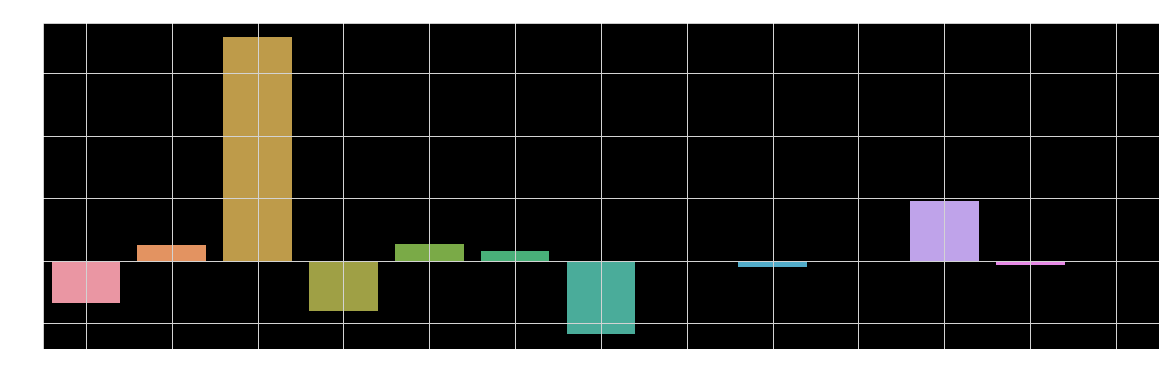

In [13]:
weight_dic.pop("is_bot", None)

keys = list(weight_dic.keys())
vals = [weight_dic[k] for k in keys]
plt.figure(figsize=(20,6))
plt.style.use("dark_background")
ax = sns.barplot(x = keys, y = vals)
ax.set_title('Weights for Each Feature')
ax.set_ylabel('Weight')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.savefig('./figures/fig6.png', transparent=True)

### **2.5 Support Vector Machines**

In [14]:
from sklearn.svm import SVC

svm = SVC(C = 0.5, kernel = 'rbf', degree = 3, gamma = 'auto')
svm.fit(X_train_scaled, y_train)

y_hat = svm.predict(X_test_scaled)

print('Confusion Matrix (AUC: {}):\n'.format(accuracy_score(y_test, y_hat)), confusion_matrix(y_test, y_hat))

print('\nReport: Support Vector Machine\n', classification_report(y_test, y_hat))


Confusion Matrix (AUC: 0.9981634527089073):
 [[2412    8]
 [   2 3023]]

Report: Support Vector Machine
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2420
           1       1.00      1.00      1.00      3025

    accuracy                           1.00      5445
   macro avg       1.00      1.00      1.00      5445
weighted avg       1.00      1.00      1.00      5445



## **PART 3 - Tweet-Level Classification**

### **3.1 Data Preprocess**

In [15]:
user_tweets = tweets['text']
y = tweets['is_bot']

In [16]:
user_tweets = user_tweets.replace(to_replace=r'@[a-z A-Z 0-9]*', value='<user>', regex=True)
user_tweets = user_tweets.replace(to_replace=r'#[a-z A-Z 0-9]*', value='<hashtag>', regex=True)
user_tweets = user_tweets.replace(to_replace=r'^(http|https)://(.*)', value='<url>', regex=True)
user_tweets = user_tweets.replace(to_replace=r'\d+', value='<number>', regex=True)

In [18]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during",
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or",
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", 
             "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's",
             "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up",
             "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's",
             "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've",
             "your", "yours", "yourself", "yourselves" ]

def remove_stopwords(data):
  data = data.apply(lambda x : ' '.join([word for word in x.split() if word not in (stopwords)]))
  return data

user_tweets = user_tweets.str.lower()
user_tweets_no_stop = remove_stopwords(user_tweets)

In [19]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(user_tweets_no_stop, y, test_size=0.2, random_state = 45)

In [20]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train2)

words_to_index = tokenizer.word_index

In [21]:
def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)

  return word_to_vec_map

word_to_vec_map = read_glove_vector('./glove/glove.twitter.27B.50d.txt')

In [22]:
from keras.layers.embeddings import Embedding

maxLen = 32
vocab_len = len(words_to_index)
embed_vector_len = word_to_vec_map['moon'].shape[0]

emb_matrix = np.zeros((vocab_len, embed_vector_len))

for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
    emb_matrix[index, :] = embedding_vector

embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=False)

In [23]:
from keras.layers import LSTM, Activation, Dropout, Dense, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.models import Model

def rnn(input_shape):
  X_indices = Input(input_shape)
  embeddings = embedding_layer(X_indices)
  X = LSTM(128, return_sequences=True, activation='relu')(embeddings)
  X = Dropout(0.5)(X)
  X = LSTM(64, return_sequences=True, activation='relu')(X)
  X = Dense(1, activation='relu')(X)
  model = Model(inputs=X_indices, outputs=X)
  return model

In [24]:
model = rnn((maxLen,))
model.summary()

2021-12-08 17:04:29.199736: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 32, 50)            78994650  
_________________________________________________________________
lstm (LSTM)                  (None, 32, 128)           91648     
_________________________________________________________________
dropout (Dropout)            (None, 32, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32, 64)            49408     
_________________________________________________________________
dense (Dense)                (None, 32, 1)             65        
Total params: 79,135,771
Trainable params: 141,121
Non-trainable params: 78,994,650
___________________________________________

In [25]:
from keras.preprocessing.sequence import pad_sequences

X_train_indices = tokenizer.texts_to_sequences(X_train2)
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')

In [26]:
import tensorflow as tf

adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_indices, Y_train2, batch_size=128, epochs=10)

2021-12-08 17:06:27.444249: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
40579/40579 [==============================] - 2656s 65ms/step - loss: 0.3388 - accuracy: 0.8486
Epoch 2/10
40579/40579 [==============================] - 2809s 69ms/step - loss: 0.2835 - accuracy: 0.8795
Epoch 3/10
40579/40579 [==============================] - 2701s 67ms/step - loss: 0.2575 - accuracy: 0.8929
Epoch 4/10
40579/40579 [==============================] - 2973s 73ms/step - loss: 0.2487 - accuracy: 0.8966
Epoch 5/10
40579/40579 [==============================] - 2669s 66ms/step - loss: 0.2440 - accuracy: 0.8987
Epoch 6/10
40579/40579 [==============================] - 2616s 64ms/step - loss: 0.2403 - accuracy: 0.9003
Epoch 7/10
40579/40579 [==============================] - 2674s 66ms/step - loss: 0.2370 - accuracy: 0.9018
Epoch 8/10
40579/40579 [==============================] - 2793s 69ms/step - loss: 0.2348 - accuracy: 0.9028
Epoch 9/10
40579/40579 [==============================] - 2659s 66ms/step - loss: 0.2331 - accuracy: 0.9035
Epoch 10/10
40579/40579 [===

In [28]:
X_test_indices = tokenizer.texts_to_sequences(X_test2)
X_test_indices = pad_sequences(X_test_indices, maxlen=maxLen, padding='post')

model.evaluate(X_test_indices, Y_test2)

40579/40579 [==============================] - 329s 8ms/step - loss: 0.2320 - accuracy: 0.9044


[0.2320411503314972, 0.9043644666671753]